In [4]:
import numpy as np

from astropy import units as u
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

imp = u.imperial
faring_height = (82.7 * imp.inch).cgs
faring_radius = (13.95*imp.inch).cgs

fudge = 5*u.cm
    
faring_diameter = 2 * faring_radius

bus_height = 60 * u.cm
fudge = 5*u.cm



In [5]:
def extra_length(epd, earth_avoid_angle, **kwargs):
    from astropy import units as u
    import numpy as np

    diag = kwargs.pop('diag', False)
    
    sun_avoid_angle = 45*u.deg
    fov = 4.0*u.deg # half angle


    h = epd / np.tan(earth_avoid_angle)
    h1 = (np.tan(fov) * epd) / (np.tan(earth_avoid_angle) * (np.tan(earth_avoid_angle) - np.tan(fov)))

    baffle_height = h + h1

    epd_delta = baffle_height * np.tan(fov)
    baffle_opening = epd+2*epd_delta

    sh0 = (baffle_opening) / np.tan(sun_avoid_angle)
    sh1 = (np.tan(fov) * baffle_opening) / (np.tan(sun_avoid_angle) * (np.tan(sun_avoid_angle) - np.tan(fov)))
    
    sun_shield = sh0 + sh1
    sun_shield_diameter = baffle_opening + 2 * sun_shield*np.tan(fov)
    
    if diag:
        print('End losses')
        print('Earth baffle height for {} earth avoidance is {:.2f}'.format(earth_avoid_angle, baffle_height))
        print('Sun baffle height for {} sun avoidance is {:.2f}'.format(sun_avoid_angle, sun_shield))
        print('Sun baffle diameter: {}'.format(sun_shield_diameter))
        print('Length of baffle + sun-shield {:.2f}'.format(sun_shield + baffle_height))
        
    return sun_shield+baffle_height

    


In [18]:
epd = 280*u.mm
earth_avoid_angle = 35*u.deg


lengths = extra_length(epd, earth_avoid_angle, diag=True)

telescope_height = 646*u.mm
primary_diameter = 323*u.mm
primary_thickness = 76 * u.mm

print(lengths + telescope_height)



#telescope_height = (faring_height - bus_height - fudge - lengths).to(u.mm) # for 45-degree baffle
#print(telescope_height)

#print(bus_height + fudge+lengths + telescope_height)


End losses
Earth baffle height for 35.0 deg earth avoidance is 444.25 mm
Sun baffle height for 45.0 deg sun avoidance is 367.85 mm
Sun baffle diameter: 393.5749466344554 mm
Length of baffle + sun-shield 812.10 mm
1458.0987034716072 mm


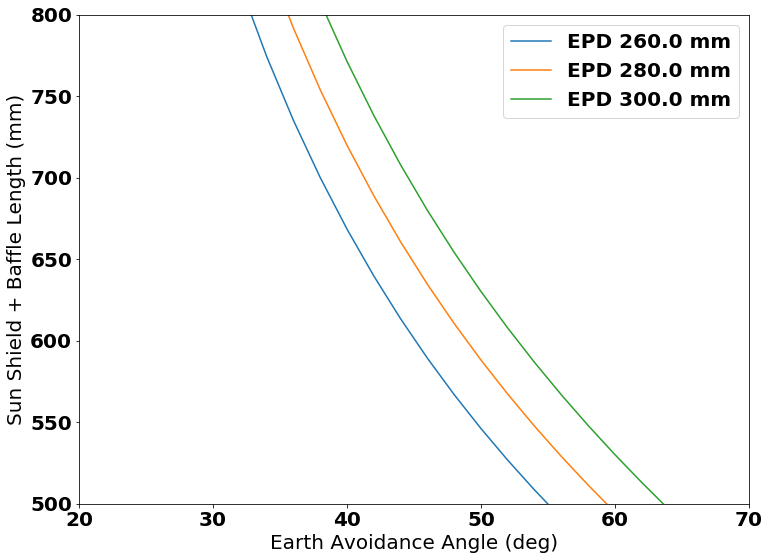

In [15]:
f = plt.figure(figsize=(12, 9))
avoid_range = (np.arange(30)*2 + 10)*u.deg
for epd in [260, 280, 300]*u.mm:
    
    lengths = extra_length(epd, avoid_range)

    plt.plot(avoid_range*u.deg, lengths, label='EPD {}'.format(epd))
    
plt.xlabel('Earth Avoidance Angle (deg)')
plt.ylabel('Sun Shield + Baffle Length (mm)')
plt.ylim([500, 800])
plt.xlim([20, 70])
plt.legend()
plt.show()




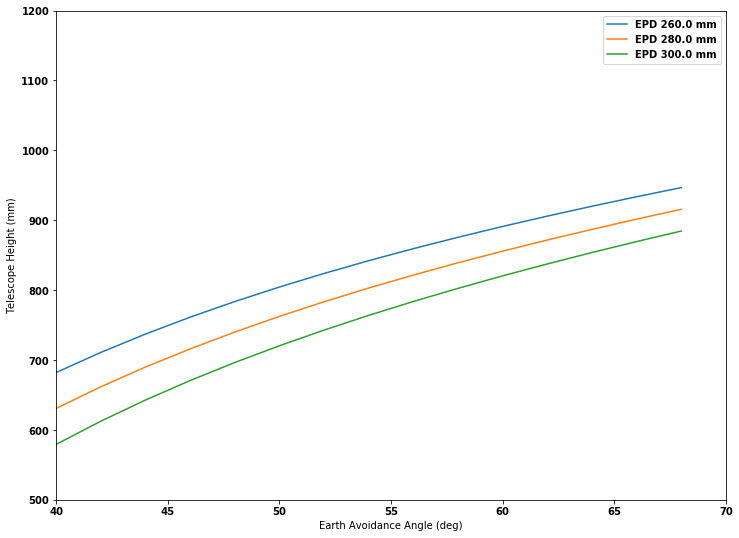

In [5]:


f = plt.figure(figsize=(12, 9))
avoid_range = (np.arange(30)*2 + 10)*u.deg
for epd in [260, 280, 300]*u.mm:
    
    lengths = extra_length(epd, avoid_range)
    telescope_height = (faring_height - bus_height - fudge - lengths).to(u.mm) # for 45-degree baffle


    plt.plot(avoid_range*u.deg, telescope_height, label='EPD {}'.format(epd))



plt.plot()
plt.xlabel('Earth Avoidance Angle (deg)')
plt.ylabel('Telescope Height (mm)')
plt.xlim([40, 70])
plt.ylim(500, 1200)
plt.legend()
plt.show()



